In [1]:
#Attribute: https://www.kaggle.com/code/nadaemad2002/intel-image-classification-cnn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2
import keras
from tensorflow.keras.models import Sequential, Model

In [24]:
trainpath = 'https://drive.google.com/drive/folders/1l396YZ2wl7RX16BWqBpaHRqYWk1136yh?usp=drive_link'
testpath = 'https://drive.google.com/drive/folders/1bd7AzP7zMOILbDOvKC333Zc6Q_Lx4Qo_?usp=drive_link'
predpath = 'https://drive.google.com/drive/folders/1HdylLjyRWkHVv_Cidbj6UreTTnUL4S9o?usp=drive_link'

In [25]:
IMAGE_SIZE = (228, 228)

BATCH_SIZE = 32

In [27]:
!pip install gdown

import gdown
import tensorflow as tf
import os

# Download the training data
trainpath_local = 'train_data'  # Specify a local directory to store the data
gdown.download_folder(url='https://drive.google.com/drive/folders/1l396YZ2wl7RX16BWqBpaHRqYWk1136yh?usp=drive_link', output=trainpath_local, quiet=False)

# Download the testing data
testpath_local = 'test_data'
gdown.download_folder(url='https://drive.google.com/drive/folders/1bd7AzP7zMOILbDOvKC333Zc6Q_Lx4Qo_?usp=drive_link', output=testpath_local, quiet=False)

# Download the prediction data
predpath_local = 'pred_data'
gdown.download_folder(url='https://drive.google.com/drive/folders/1HdylLjyRWkHVv_Cidbj6UreTTnUL4S9o?usp=drive_link', output=predpath_local, quiet=False)

# Now use the local directory paths
# Print the contents of the directory to verify the downloaded files
# print(os.listdir(trainpath_local))

# Check for subdirectories and their contents
# for subdir in os.listdir(trainpath_local):
#    subdir_path = os.path.join(trainpath_local, subdir)
#    if os.path.isdir(subdir_path):
#        print(f"Subdirectory: {subdir}, Contents: {os.listdir(subdir_path)}")

IMAGE_SIZE = (228, 228)
BATCH_SIZE = 32

# Define a function to filter out unsupported file formats
def filter_image_files(file_path):
  return file_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))

# Get a list of all files in the trainpath_local directory and its subdirectories
all_files = []
for root, dirs, files in os.walk(trainpath_local):
  for file in files:
    all_files.append(os.path.join(root, file))

# Filter the list to include only supported image files
image_files = list(filter(filter_image_files, all_files))

# Check if any image files were found
if not image_files:
  raise ValueError(f"No valid image files found in directory {trainpath_local}. Please ensure your images are in supported formats and organized correctly.")

# Create a TensorFlow Dataset from the filtered image files
train_ds = tf.keras.utils.image_dataset_from_directory(
  trainpath_local, # Use the local path
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE,
  shuffle=True,
  validation_split=0.2, # Optional: Split data into training and validation sets
  subset='training', # Optional: Specify which subset
)
  #validation_split=0.2, # Optional: Split data into training and validation sets
  #subset='training', # Optional: Specify which subset

Retrieving folder contents


Processing file 1XHubL3cuJlSoXluEHTwrLEu5K1KXw5on Nicolas Cage2.jpg
Processing file 1Q9-VbCCdNimW2gupmimJNIbO6hK-ThAS Nicolas Cage3.jpg
Processing file 1p_Nlz3sXG6mFfrUnxVFjIMvmzwncKJAp Nicolas Cage4.jpg
Processing file 1RBhFgP4TY9rAVz2XiwplOwOr2BR3P2Vg NicolasCage.jpg


Retrieving folder contents completed
Building directory structure
Building directory structure completed


FileURLRetrievalError: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1XHubL3cuJlSoXluEHTwrLEu5K1KXw5on

but Gdown can't. Please check connections and permissions.

In [28]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  testpath_local,  # Change this to the local directory path
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory test_data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [30]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'train_ds' is not defined

In [31]:
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names
images_paths = getImagePaths(predpath)
len(images_paths)

0

In [32]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

NameError: name 'test_ds' is not defined

<Figure size 1000x1000 with 0 Axes>

In [34]:
import tensorflow.keras.models as Models

In [35]:
model = Models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(228,228,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'class_names' is not defined

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 226, 226, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,639,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,873,120 (7.15 MB)

 Trainable params: 1,873,120 (7.15 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss',
                              patience=5,
                              verbose=1,
                              mode='min'
                             )

checkpointer = ModelCheckpoint(filepath='bestvalue.keras', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

In [39]:
history = model.fit(train_ds,
    validation_data=test_ds,
    epochs=40,
    callbacks=callback_list
)

NameError: name 'train_ds' is not defined

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

NameError: name 'history' is not defined

NameError: name 'history' is not defined

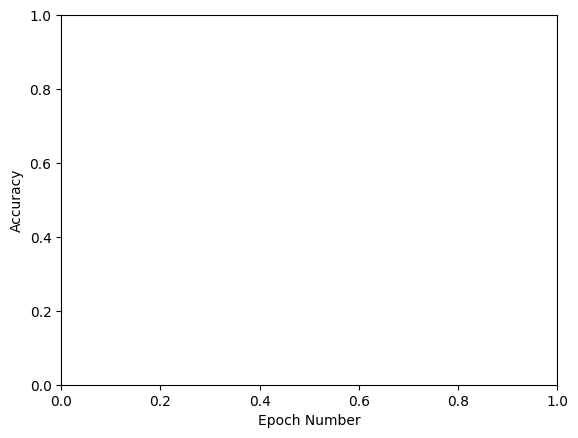

In [41]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [42]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

In [43]:
from tensorflow.keras.preprocessing import image
predict_image('https://drive.google.com/file/d/1WBJ4J1ch9hT7538myxHmRZTHtq7pcBcG/view?usp=drive_link', model)

FileNotFoundError: [Errno 2] No such file or directory: 'https://drive.google.com/file/d/1WBJ4J1ch9hT7538myxHmRZTHtq7pcBcG/view?usp=drive_link'